In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from pylab import rcParams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import pickle
from sklearn.neural_network import MLPClassifier

In [2]:
train=pickle.load(open('train_fs.pickle','rb'))
test=pickle.load(open('test_fs.pickle','rb'))
train_labels=pickle.load(open('train_labels_fs.pickle','rb'))
test_labels=pickle.load(open('test_labels_fs.pickle','rb'))

In [4]:
test

<10000x20812 sparse matrix of type '<class 'numpy.float64'>'
	with 173558 stored elements in Compressed Sparse Row format>

In [3]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 100), random_state=1)

In [4]:
clf.fit(train,train_labels)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [5]:
predicted_test = clf.predict(test)
actual_test=np.array(test_labels)
accuracy=1-sum(abs(predicted_test-actual_test))/actual_test.size

In [6]:
accuracy*100

87.819999999999993

In [7]:
result=confusion_matrix(predicted_test,test_labels)
result

array([[ 656,  505],
       [ 713, 8126]])

In [6]:
result= result/ result.astype(np.float).sum(axis=0)

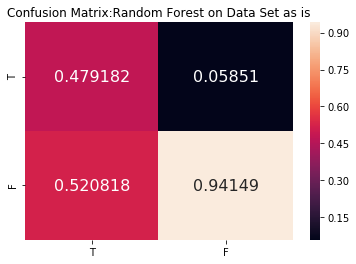

In [7]:
import seaborn as sn
df_cm=pd.DataFrame(result,['T', 'F'],['T','F'])
sn.heatmap(df_cm,annot=True,annot_kws={"size":16},fmt='g')
#plt.xlabel('Deviation From Actual')
#ylabel='Actual'
plt.title('Confusion Matrix:Random Forest on Data Set as is')
plt.show()